In [ ]:
"""
# Copyright (C) 2024 Jesús Bautista Villar <jesbauti20@gmail.com>
"""

In [24]:
import os
import sys

# Algebra (Numerical computation)
import numpy as np

# Graphic Tools (Visualization)
import matplotlib.pyplot as plt

# -------------------------------------------------------------------------------------

# Swarm Systems Lab PySimUtils
from ssl_simulator.visualization import vector2d, config_axis, set_paper_parameters

set_paper_parameters(16)

# Python project to path 
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import afc

## Simulation: Numerical validation of Proposition 1 

In [ ]:
## Parameters #####

# Reference shape
p_star = np.array([[-1,-1], [-1,1], [1,1], [1,-1]]) # square
n = p_star.shape[0]

## Generate the simulation frames #####
tf = 2
h = 5

args = {
    "Z"     : ((1,2), (1,3), (2,3), (2,4), (3,4), (4,1)), 
    "p_star": p_star,
    "p0"    : [[-9,-3], [-5,-5], [0,4], [0,-5]],
    "tf"    : tf, 
    "h"     : h,
    "kappa" : 1, 
}

sim_fr = afc.AffineComplexSimulator(**args)
sim_fr.check_W_L(eigenvectors=False)

## Design the parameters of a body-fixed desired velocity in S #####
params = [1, 0, 0, 0, 0, 0, 0]
afc.check_case(sim_fr, params, debug=True)

In [ ]:
## Design M #####

# mu_ij weights for the given p_star and Z --------------------------------------------
def get_MBt(params):
    MBt_x = np.array([[0,0,0,-1], [0,0,-1,0], [0,1,0,0], [1,0,0,0]])/2
    MBt_y = np.array([[0,-1,0,0], [1,0,0,0], [0,0,0,1], [0,0,-1,0]])/2

    MBt_ax = np.array([[0,0,0,1], [0,0,1,0], [0,1,0,0], [1,0,0,0]])/2
    MBt_ay = np.array([[0,1,0,0], [1,0,0,0], [0,0,0,1], [0,0,1,0]])/2
    MBt_w = np.array([[0,1,0,-1], [-1,0,1,0], [0,-1,0,1], [1,0,-1,0]])/2
    MBt_hx = np.array([[0,0,0,1], [0,0,-1,0], [0,1,0,0], [-1,0,0,0]])/2
    MBt_hy = np.array([[0,1,0,0], [-1,0,0,0], [0,0,0,1], [0,0,-1,0]])/2

    vx, vy, ax, ay, omega, hx, hy = params

    MBt = vx*MBt_x + vy*MBt_y + ax*MBt_ax + ay*MBt_ay
    MBt += omega*MBt_w + hx*MBt_hx + hy*MBt_hy
    return MBt
# -------------------------------------------------------------------------------------

# Pass the weights to the simulation frame, it will compute M and L_mod
sim_fr.set_manual_mu(get_MBt(params))

## Calculate the lower bound of h (h_l) #####
sim_fr.check_MBT(eigenvectors=False)
hl = sim_fr.kappa * 1 # maximum eigenvalue (from previous print)
print(f"\n{hl=}\n")

## Launch the simulation #####
sim_fr.numerical_simulation()

In [ ]:
## Generate the paper plot ####

# Init figure and config axes
fig = plt.figure(figsize=(8,4), dpi=400, constrained_layout=True)
ax1, ax2 = fig.subplots(1,2)

config_axis(ax1, 4, 4)
config_axis(ax2, 0.4, 1)

lim = 10
ax1.set_xlim([-lim, lim])
ax1.set_ylim([-lim, lim])
ax1.grid(True)
ax1.set_aspect("equal")
ax1.set_xlabel(r"$p_x$ [L]")
ax1.set_ylabel(r"$p_y$  [L]")

ax2.grid(True)
ax2.set_xlabel(r"$t$ [s]")
ax2.set_ylabel(r"$\|p_\mathcal{C}\|$")

# Axis: X-Y
sim_fr.plot(ax1)
ax1.legend(ncols=4, fontsize="xx-small", loc="upper center")

pc = np.mean(np.array([np.real(sim_fr.data["x"])[-1,:], 
                       np.imag(sim_fr.data["x"])[-1,:]]), 1)

vector2d(ax1, pc, pc+1, lw=2, hw=0.5, hl=1, zorder=4)
# ax1.text(pc[0]+4, pc[1]+0.5, r"$T_\Delta(v^*)$", fontdict={"size":14})

# Axis: ||p_perp||
ax2.axhline(0, c="k", lw=1)
ax2.plot(sim_fr.data["t"], sim_fr.data["p_perp_norm"])

plt.show()

## Simulation: Numerical validation of Proposition 2

In [ ]:
## Generate the simulation frame #####

# Reference shape
p_star = np.array([[-1,-1], [-1,1], [1,1], [1,-1]]) # square
p_0 = np.array([[-1,-1], [-1,1], [1,1], [1,-1]]) # square

args = {
    "Z"     : ((1,2), (1,3), (2,3), (2,4), (3,4), (4,1)),
    "p_star": p_star,
    "p0"    : p_0, # temp
    "tf"    : 2, 
    "h"     : 1,
    "kappa" : 1, #tmp
}

sim_fr = afc.AffineComplexSimulator(**args)

In [ ]:
## Design parameters for the body-fixed desired velocity in S #####

# mu_ij weights for the given p_star and Z --------------------------------------------
def get_MBt(params):
    MBt_x = np.array([[0,0,0,-1], [0,0,-1,0], [0,1,0,0], [1,0,0,0]])/2
    MBt_y = np.array([[0,-1,0,0], [1,0,0,0], [0,0,0,1], [0,0,-1,0]])/2

    MBt_ax = np.array([[0,0,0,1], [0,0,1,0], [0,1,0,0], [1,0,0,0]])/2
    MBt_ay = np.array([[0,1,0,0], [1,0,0,0], [0,0,0,1], [0,0,1,0]])/2
    MBt_w = np.array([[0,1,0,-1], [-1,0,1,0], [0,-1,0,1], [1,0,-1,0]])/2
    MBt_hx = np.array([[0,0,0,1], [0,0,-1,0], [0,1,0,0], [-1,0,0,0]])/2
    MBt_hy = np.array([[0,1,0,0], [-1,0,0,0], [0,0,0,1], [0,0,-1,0]])/2

    vx, vy, ax, ay, omega, hx, hy = params

    MBt = vx*MBt_x + vy*MBt_y + ax*MBt_ax + ay*MBt_ay
    MBt += omega*MBt_w + hx*MBt_hx + hy*MBt_hy
    return MBt
# -------------------------------------------------------------------------------------

# Parameters examples -----------------------------------------------------------------
# C1
params_c1a = [2, 0, 0.5, 0, 1, 0.1, 1]
params_c1b = [1, 0, 1, 1, 0, 0, 0]

# C2
params_c2a = [0, 0, 1, 1, 0, 0, 0.5]
params_c2b = [0, 0, 1, 1, 0, 0.5, 0]

# C3
params_c3 = [2, 2, 0.5, 1, 0, 1, 0.5]

# C4
params_c4 = [10, 0, 1, 4, 0, 4, 1]

# C5
params_c5a = [0, 2, 0, 0, 0, 0, 1]
params_c5b = [1, 0, 0, 0, 0, 1, 0]
params_c5c = [1, 0, 0, 0, 0, 0, 0]
params_c5d = [0, 1, 0, 0, 0, 0, 0]

# C6

params_c6a = [0, 1, 0, 0, 0, 1, 0]
params_c6b = [1, 0, 0, 0, 0, 0, 2]
# -------------------------------------------------------------------------------------

params_c1 = params_c1a
params_c2 = params_c2a
params_c3 = params_c3
params_c4 = params_c4
params_c5 = params_c5d
params_c6 = params_c6a

afc.check_case(sim_fr, params_c1a, debug=True)
afc.check_case(sim_fr, params_c1b, debug=True)
afc.check_case(sim_fr, params_c2a, debug=True)
afc.check_case(sim_fr, params_c2b, debug=True)
afc.check_case(sim_fr, params_c3, debug=True)
afc.check_case(sim_fr, params_c4, debug=True)
afc.check_case(sim_fr, params_c5a, debug=True)
afc.check_case(sim_fr, params_c5b, debug=True)
afc.check_case(sim_fr, params_c5c, debug=True)
afc.check_case(sim_fr, params_c5d, debug=True)
afc.check_case(sim_fr, params_c6a, debug=True)
afc.check_case(sim_fr, params_c6b, debug=True)

In [ ]:
## Execute the simulations and extract the plot data #####

def plot_case(params, alphas_list, ax, kappa):
    sim_fr.kappa = kappa
    
    # Calculate the initial condition for the given alphas
    pt = afc.get_pt_parallel(sim_fr, params, alphas_list)
    p0 = pt(0)
    sim_fr.x0 = p0

    # Set the matrix M and kappa
    sim_fr.set_manual_mu(get_MBt(params))
    
    # Launch the numerical simulation and plot
    sim_fr.numerical_simulation()
    sim_fr.plot(ax, alpha1=0.5, alpha2=1)

    # Plot the analytical solution
    t_list = np.linspace(0, sim_fr.tf*2, 100)
    pt_eval = np.zeros((len(t_list), sim_fr.n), dtype=complex)

    for i,t in enumerate(t_list):
        pt_eval[i,:] = pt(t)

    for i in range(sim_fr.n):
        ax.plot(
            np.real(pt_eval[:,i]), 
            np.imag(pt_eval[:,i]), 
            c=afc.COLORS[i], ls="--", lw=1, dashes=(3, 5)
        )
    
    print(f"{sim_fr.x0=}")
    print(f"{params=}, {alphas_list=}, {kappa=} \n")
    
kappa1, kappa2, kappa3, kappa4, kappa5, kappa6 = 0.8, 0.32, 0.35, 0.05, 1.4, 1

alphas1 = [2,0.5,1j]
alphas2 = [1+1j,3+5j,0.8]
alphas3 = [-10-5j,1j,1+0.25j]
alphas4 = [-15-20j,2j,1+1j]
alphas5 = [-2-2j,2,2+2j]
alphas6 = [-4-4j,5+0j,-1+1j]

In [ ]:
# Generate and configure the plot -----------------------------------------------------
fig = plt.figure(figsize=(8,13.5), dpi=400)
axes = fig.subplots(3,2)
ax1, ax2, ax3, ax4, ax5, ax6 = axes.flatten()

lim = 18
for ax in axes.flatten():
    config_axis(ax, xlims=[-lim,lim], ylims=[-lim,lim])
    ax.set_aspect("equal")

ax1.set_ylabel(r"$p_y$ [L]")
ax3.set_ylabel(r"$p_y$ [L]")
ax5.set_ylabel(r"$p_y$ [L]")
ax5.set_xlabel(r"$p_x$ [L]")
ax6.set_xlabel(r"$p_x$ [L]")

ax1.text(13, -16, "C1)", fontdict={"size":14}, weight="bold")
ax2.text(13, -16, "C2)", fontdict={"size":14}, weight="bold")
ax3.text(13, -16, "C3)", fontdict={"size":14}, weight="bold")
ax4.text(13, -16, "C4)", fontdict={"size":14}, weight="bold")
ax5.text(13, -16, "C5)", fontdict={"size":14}, weight="bold")
ax6.text(13, -16, "C6)", fontdict={"size":14}, weight="bold")

def gen_title(params_c, kappa, alphas):
    delta_v = [params_c[0], params_c[1], params_c[2], params_c[3], 
               params_c[5]-params_c[4], params_c[6]+params_c[4]]
    title = r"$\Delta_v =$ " + str(delta_v) + r", $\kappa =$ " + str(kappa) + ",\n"

    # Format the complex numbers in alphas
    alphas_latex = []
    for c in alphas:
        real = f"{int(c.real)}" if c.real%1 == 0 else (f"{c.real:.1f}" if c.real*10%1 == 0 else f"{c.real:.2f}")
        imag = f"{int(abs(c.imag))}" if c.imag%1 == 0 else (f"{abs(c.imag):.1f}" if c.imag*10%1 == 0 else f"{abs(c.imag):.2f}")
        sign = "+" if c.imag >= 0 else "-"

        if c.real != 0 and c.imag != 0:
            alphas_latex.append(f"({real} {sign} \\iota{imag})")
        elif c.real != 0 :
            alphas_latex.append(f"{real}")
        elif c.imag != 0 :
            if sign == "-":
                alphas_latex.append(f"{sign} \\iota{imag}")
            else:
                alphas_latex.append(f"\\iota{imag}")
        else:
            alphas_latex.append(f"0")
 
    alphas_str = ", ".join(alphas_latex)

    # Join alphas to the main string
    title += r"$\alpha_{\{1,2,3\}} = [" + alphas_str + "]$"
    return title

title1 = gen_title(params_c1, kappa1, alphas1)
title2 = gen_title(params_c2, kappa2, alphas2)
title3 = gen_title(params_c3, kappa3, alphas3)
title4 = gen_title(params_c4, kappa4, alphas4)
title5 = gen_title(params_c5, kappa5, alphas5)
title6 = gen_title(params_c6, kappa6, alphas6)

ax1.set_title(title1, fontdict={"size":13})
ax2.set_title(title2, fontdict={"size":13})
ax3.set_title(title3, fontdict={"size":13})
ax4.set_title(title4, fontdict={"size":13})
ax5.set_title(title5, fontdict={"size":13})
ax6.set_title(title6, fontdict={"size":13})

# -------------------------------------------------------------------------------------

# Execute the simulations and extract the plot data -----------------------------------
plot_case(params_c1, alphas1, ax1, kappa1)
plot_case(params_c2, alphas2, ax2, kappa2)
plot_case(params_c3, alphas3, ax3, kappa3)
plot_case(params_c4, alphas4, ax4, kappa4)
plot_case(params_c5, alphas5, ax5, kappa5)
plot_case(params_c6, alphas6, ax6, kappa6)

ax1.legend(ncols=4, fontsize="xx-small", loc="upper center")
# -------------------------------------------------------------------------------------

plt.show()

## Simulation: Application with large number of robots

In [25]:
## Generate the simulation frame #####

def gen_Z_large(layers=1):
    Z = []
    for i in range(layers):
        if i == 0:
            Z.extend([(1,2), (1,3), (2,3), (2,4), (3,4), (4,1)])
        else:
            m = 4*i
            m_last = 4*(i-1)
            Z.extend([(m+1,m_last+4), (m+2,m_last+3), (m+2,m_last+4), (m+3,m_last+4), (m+4,m_last+1)])
            Z.extend([(m+1,m+2), (m+1,m+3), (m+2,m+3), (m+2,m+4), (m+3,m+4), (m+4,m+1)])
    return Z

def gen_pstar_large(layers=1):
    p_star = np.zeros((4*layers), dtype=complex)
    for i in range(layers):
        if i == 0:
            p_star[0:4] = [-1-1j, -1+1j, 1+1j, 1-1j]
        else:
            p_star[i*4:(i+1)*4] = p_star[0:4] * 1.1**i
    return np.array(p_star)

def get_deltav(params_c):
    delta_v = [params_c[0], params_c[1], params_c[2], params_c[3], 
               params_c[5]-params_c[4], params_c[6]+params_c[4]]
    return delta_v

# Edges set, reference shape and initial condition
layers = 10
Z = gen_Z_large(layers)
p_star = gen_pstar_large(layers)
p0 = (-25 + 10j) + p_star
kappa = 0.8

args = {
    "Z"     : Z,
    "p_star": p_star,
    "p0"    : p0,
    "tf"    : 10, 
    "h"     : 3,
    "kappa" : kappa,
}

sim_fr = afc.AffineComplexSimulator(**args)

print(p_star.shape)
# print(Z)
# sim_fr.check_W_L(eigenvectors=False)

(40,)


In [26]:
## Design parameters for the body-fixed desired velocity in S #####

# mu_ij weights for the given p_star and Z --------------------------------------------
MBt_x = afc.gen_MBt(Z, p_star, [1,0,0])
MBt_y = afc.gen_MBt(Z, p_star, [1j,0,0])

MBt_ax = afc.gen_MBt(Z, p_star, [0,1,0])
MBt_ay = afc.gen_MBt(Z, p_star, [0,0,1j])
MBt_hx = afc.gen_MBt(Z, p_star, [0,1j,0])
MBt_hy = afc.gen_MBt(Z, p_star, [0,0,1])

MBt_w = afc.gen_MBt(Z, p_star, [0,1j,-1])

def get_MBt(params):
    vx, vy, ax, ay, omega, hx, hy = params

    MBt = vx*MBt_x + vy*MBt_y + ax*MBt_ax + ay*MBt_ay
    MBt += omega*MBt_w + hx*MBt_hx + hy*MBt_hy
    return MBt
# -------------------------------------------------------------------------------------

Executing numerical simulation: 100%|██████████| 10000/10000 [00:00<00:00, 51620.49it/s]


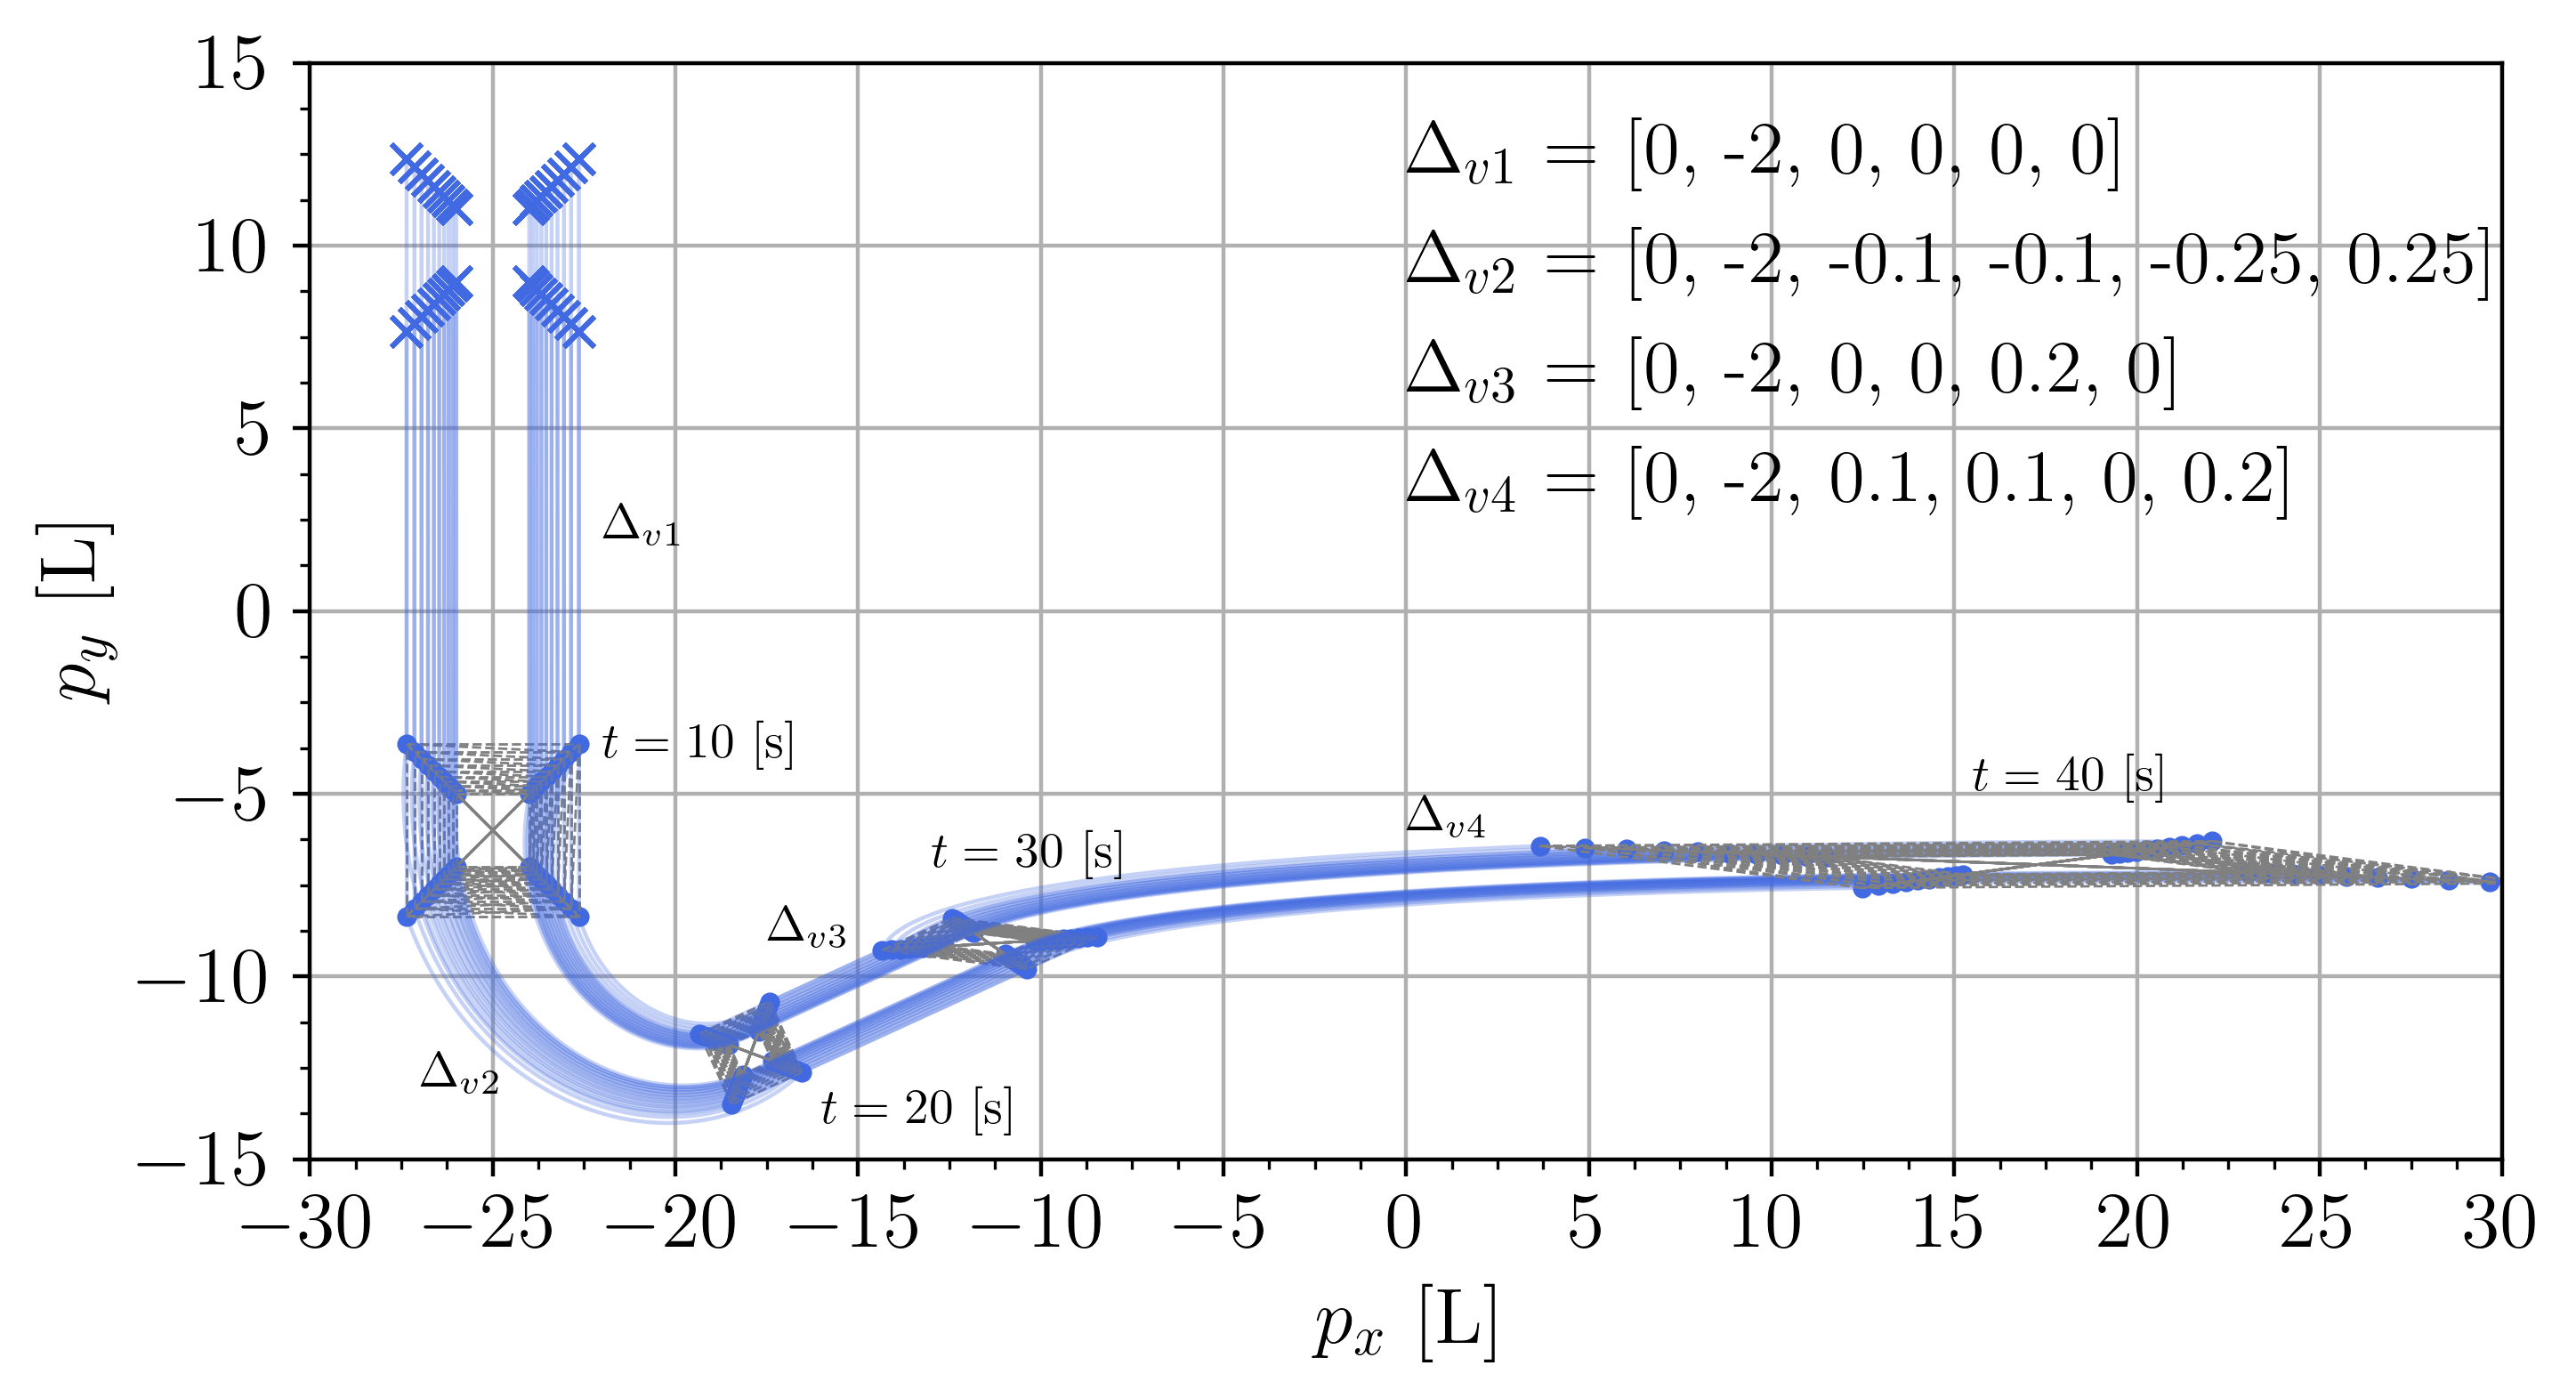

In [27]:
# Init figure and config axes
fig = plt.figure(figsize=(9,4), dpi=400)
ax1 = fig.subplots(1,1)

config_axis(ax1, 5, 5)

lim = 15
ax1.set_xlim([-lim*2, lim*2])
ax1.set_ylim([-lim, lim])
ax1.grid(True)
ax1.set_aspect("equal")
ax1.set_xlabel(r"$p_x$ [L]")
ax1.set_ylabel(r"$p_y$  [L]")

## Launch the simulation #####
params1 = [0, -2, 0, 0, 0, 0, 0]
sim_fr.set_manual_mu(get_MBt(params1))
sim_fr.numerical_simulation(reset=True)
sim_fr.plot(ax1, colored=False, tail=False, lw_net=0.5)

params2 = [0, -2, -0.1, -0.1, 0.25, 0, 0]
sim_fr.set_manual_mu(get_MBt(params2))
sim_fr.numerical_simulation(reset=False)
sim_fr.plot(ax1, colored=False, tail=False, lw_net=0.5)

params3 = [0, -2, 0, 0, 0, 0.2, 0]
# check_case(sim_fr, params, debug=True)
sim_fr.set_manual_mu(get_MBt(params3))
sim_fr.numerical_simulation(reset=False)
sim_fr.plot(ax1, colored=False, tail=False, lw_net=0.5)

params4 = [0, -2, 0.1, 0.1, 0, 0, 0.2]
sim_fr.set_manual_mu(get_MBt(params4))
sim_fr.numerical_simulation(reset=False)
sim_fr.plot(ax1, colored=False, alpha1=0.3, lw_net=0.5)

ax1.text(-22, -4,    r"$t = 10$ [s]", fontdict={"size":10})
ax1.text(-16, -14,   r"$t = 20$ [s]", fontdict={"size":10})
ax1.text(-13, -7,    r"$t = 30$ [s]", fontdict={"size":10})
ax1.text(15.5, -4.9, r"$t = 40$ [s]", fontdict={"size":10})

ax1.text(-22, 2,   r"$\Delta_{v1}$", fontdict={"size":10})
ax1.text(-27, -13, r"$\Delta_{v2}$", fontdict={"size":10})
ax1.text(-17.5, -9,  r"$\Delta_{v3}$", fontdict={"size":10})
ax1.text(0, -6,    r"$\Delta_{v4}$", fontdict={"size":10})

ax1.text(0, 12, r"$\Delta_{v1}$ = " + str(get_deltav(params1)), fontdict={"size":15})
ax1.text(0, 9,  r"$\Delta_{v2}$ = " + str(get_deltav(params2)), fontdict={"size":15})
ax1.text(0, 6,  r"$\Delta_{v3}$ = " + str(get_deltav(params3)), fontdict={"size":15})
ax1.text(0, 3,  r"$\Delta_{v4}$ = " + str(get_deltav(params4)), fontdict={"size":15})

## Generate the plot #####
plt.show()


Executing numerical simulation: 100%|██████████| 10000/10000 [00:00<00:00, 43179.88it/s]


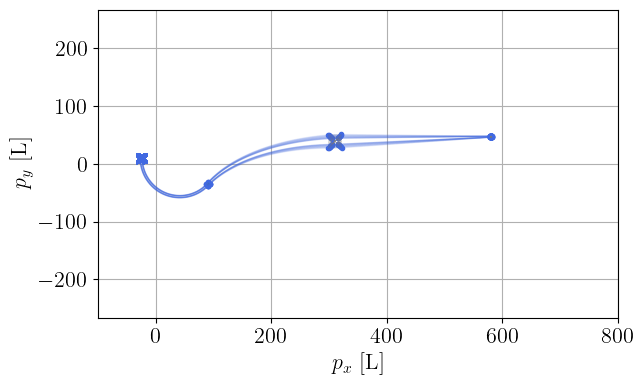

In [28]:
# Init figure and config axes
fig = plt.figure(figsize=(9,4), dpi=100)
ax1 = fig.subplots(1,1)

# config_axis(ax1, 5, 5)

lim = 400
ax1.set_xlim([-lim/4, lim*2])
ax1.set_ylim([-lim/1.5, lim/1.5])
ax1.grid(True)
ax1.set_aspect("equal")
ax1.set_xlabel(r"$p_x$ [L]")
ax1.set_ylabel(r"$p_y$  [L]")

## Launch the simulation #####
params1 = [0, -20, 0, 0, 0.3, 0, 0]
sim_fr.set_manual_mu(get_MBt(params1))
sim_fr.numerical_simulation(reset=True)
sim_fr.plot(ax1, colored=False, tail=False, lw_net=0.01)

params2 = [0, -6, 0.1, 0.1, -0.05, 0, 0]
sim_fr.set_manual_mu(get_MBt(params2))
sim_fr.numerical_simulation(reset=False)
sim_fr.numerical_simulation(reset=False)
sim_fr.plot(ax1, colored=False, tail=False, lw_net=0.1)

params3 = [0, -6, -0.1, -0.1, 0, 0, 0]
sim_fr.set_manual_mu(get_MBt(params3))
sim_fr.numerical_simulation(reset=False)
sim_fr.numerical_simulation(reset=False)
sim_fr.numerical_simulation(reset=False)
sim_fr.plot(ax1, colored=False, tail=False, lw_net=0.1)

# params4 = [0, -10, 0, 0, 0, 0, 0]
# sim_fr.set_manual_mu(get_MBt(params4))
# sim_fr.numerical_simulation(reset=False)
# sim_fr.numerical_simulation(reset=False)
# # sim_fr.numerical_simulation(reset=False)
# # sim_fr.plot(ax1, colored=False, tail=False, lw_net=0.1)

# # params5 = [0, -5, 0, 0, 0, 0, 0.1]
# # sim_fr.set_manual_mu(get_MBt(params5))
# # sim_fr.numerical_simulation(reset=False)
# # # sim_fr.numerical_simulation(reset=False)
# # sim_fr.numerical_simulation(reset=False)
sim_fr.plot(ax1, colored=False, alpha1=0.1, lw_net=0.1)

# ax1.text(-22, -4,    r"$t = 10$ [s]", fontdict={"size":10})
# ax1.text(-16, -14,   r"$t = 20$ [s]", fontdict={"size":10})
# ax1.text(-13, -7,    r"$t = 30$ [s]", fontdict={"size":10})
# ax1.text(15.5, -4.9, r"$t = 40$ [s]", fontdict={"size":10})

# ax1.text(-22, 2,   r"$\Delta_{v1}$", fontdict={"size":10})
# ax1.text(-27, -13, r"$\Delta_{v2}$", fontdict={"size":10})
# ax1.text(-17.5, -9,  r"$\Delta_{v3}$", fontdict={"size":10})
# ax1.text(0, -6,    r"$\Delta_{v4}$", fontdict={"size":10})

# ax1.text(0, 12, r"$\Delta_{v1}$ = " + str(get_deltav(params1)), fontdict={"size":15})
# ax1.text(0, 9,  r"$\Delta_{v2}$ = " + str(get_deltav(params2)), fontdict={"size":15})
# ax1.text(0, 6,  r"$\Delta_{v3}$ = " + str(get_deltav(params3)), fontdict={"size":15})
# ax1.text(0, 3,  r"$\Delta_{v4}$ = " + str(get_deltav(params4)), fontdict={"size":15})

## Generate the plot #####
plt.show()